## 動的計画法

In [1]:
%load_ext lab_black

In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("../../"))

from collections import defaultdict
from common.gridworld import GridWorld

#### 方策評価の実装
- pi:方策
- V:価値関数
- env:環境
- gamma:割引率

In [3]:
def eval_onestep(pi, V, env, gamma=0.9):
    delta = 0

    for state in env.states():
        action_probs = pi[state]
        new_v = 0

        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            if next_state is not None:
                r = env.reward(state, action, next_state)
                new_v += action_prob * (r + gamma * V[next_state])

        delta = max(delta, abs(V[state] - new_v))
        V[state] = new_v

    return V, delta

In [4]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True:
        V, delta = eval_onestep(pi, V, env, gamma)
        if delta < threshold:
            break
    return V

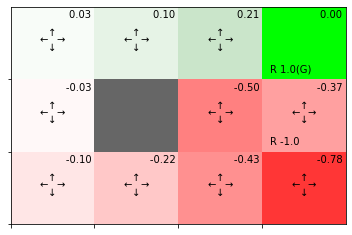

In [5]:
env = GridWorld()
gamma = 0.9

pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
V = defaultdict(lambda: 0)

V = policy_eval(pi, V, env, gamma)
env.render_v(V, pi)